## GUIA 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Ejercicio 1


![image.png](enunciados/ej1.png)

Comenzamos definiendo las variables y los datos que nos da el enunciado

Y : "Bit emitido"

X : "Bit recibido"

P(Y = 1) = 3/4 : Probabilidad de que el bit emitido sea 1

P(Y = 0) = 1/4 : Probabilidad de que el bit emitido sea 0

X|Y=0 ~ N(0,4) : Distribucion del bit recibido, dado que se emitio un 0

X|Y=1 ~ N(0,1) : Distribucion del bit recibido, dado que se emitio un 0

a) 

$p_X(x) = P(Y = 0) \cdot p_{X|Y=0}(x) + P(Y = 1) \cdot p_{X|Y=1}(x)$


$p_{X|Y=0}(x) = \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})$

$p_{X|Y=1}(x) = \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Entonces queda que

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$


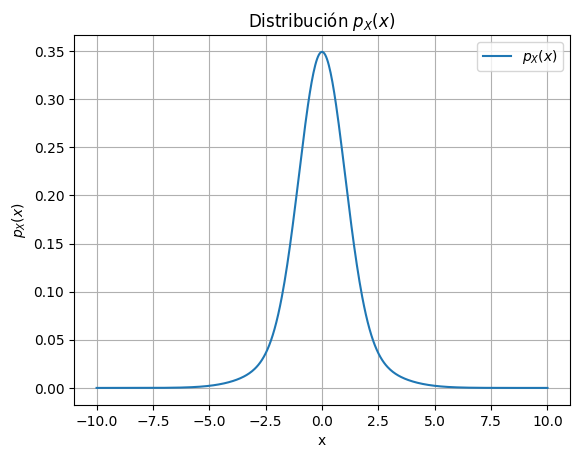

In [13]:
# Rango de X
x = np.linspace(-10, 10, 500)

p_Y1 = 0.75
p_Y0 = 0.25

# Normales
pX_dado_Y0 = p_Y0 * norm.pdf(x, 0, np.sqrt(4))
pX_dado_Y1 = p_Y1 * norm.pdf(x, 0, np.sqrt(1))

# Las sumo
p_X = pX_dado_Y0 + pX_dado_Y1

# Grafico
plt.plot(x, p_X, label=r'$p_X(x)$')
plt.title(r'Distribución $p_X(x)$')
plt.xlabel('x')
plt.ylabel(r'$p_X(x)$')
plt.legend()
plt.grid(True)

b) Para calcular $p_{Y|X}(1|x)$ podemos usar el Teorema de Bayes

$p_{Y|X}(1|x) = \frac{p_{X|Y}(x|1) \cdot p_Y(1)}{p_X(x)}$

Tenemos que

$p_{X|Y}(x|1) = \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

$p_Y(1) = 0.75$

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Entonces reemplazando queda:

$p_{Y|X}(1|x) = \frac{0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})} $




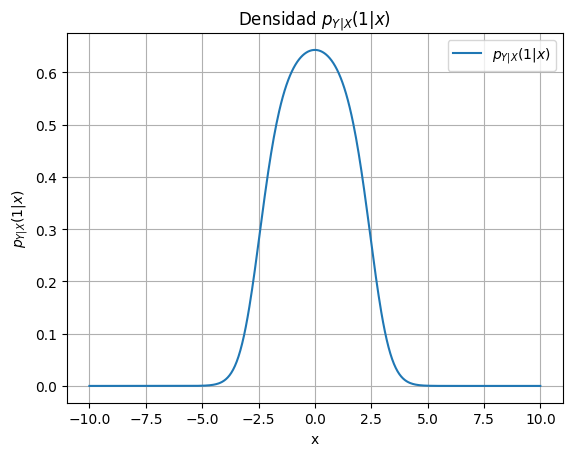

In [14]:
# Defino
pY_dado_X1 = (pX_dado_Y1 * p_Y1) / p_X

# Graficar
plt.plot(x, pY_dado_X1, label=r'$p_{Y|X}(1|x)$')
plt.title(r'Densidad $p_{Y|X}(1|x)$')
plt.xlabel('x')
plt.ylabel(r'$p_{Y|X}(1|x)$')
plt.legend()
plt.grid(True)


c) Primero calculamos $p_{Y|X}(0|x)$ de la misma forma que el inciso anterior

$p_{Y|X}(0|x) = \frac{p_{X|Y}(x|0) \cdot p_Y(0)}{p_X(x)}$

Con:

$p_{X|Y}(x|0) = \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) $

$p_Y(0) = 0.25$

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Reemplazando:

$p_{Y|X}(0|x) = \frac{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}$


Ahora:

$P_{Y|X}(1|x) > P_{Y|X}(0|x)$

$\frac{0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})} > \frac{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})}{0.25 \cdot \frac{1}{ 2 \sqrt {2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}$

$ 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) > 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})$

$0.75 \cdot  exp(-\frac{x^2}{2}) > 0.125 \cdot exp(-\frac{x^2}{8}) $

$6 \cdot exp(-\frac{3x^2}{8}) > 1 $

$|x| < \sqrt{\frac{8 \cdot Ln(6)}{3}} $

$|x| < 2.1858694$



d) 